<a href="https://colab.research.google.com/github/husnulkhotimah-husnulkhotimah/Explore-and-Visualize/blob/main/Tugas_Data_Analisis_Explore_and_Visualize_(Finish).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [ ]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True).frame

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Check apakah terdapat null values pada data
Jawaban : Tidak terdapat null values pada data

In [ ]:
# summary null values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
# detect rows containing null values
df[df.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


## Check apakah terdapat outliers pada data
Jawaban : Ada

In [ ]:
# outlier detection
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df[((df[cols] < (Q1 - 1.5 * IQR))|(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28,0.853
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29,0.600
...,...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,1.000
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47,0.775
20629,2.0943,28.0,5.519802,1.020902,6912.0,3.801980,39.12,-121.39,1.083


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28,0.853
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29,0.600
...,...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,1.000
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47,0.775
20629,2.0943,28.0,5.519802,1.020902,6912.0,3.801980,39.12,-121.39,1.083


## Check apakah terdapat duplicates pada data
jawaban : Tidak ada

In [ ]:
data_dict = {'MedInc' : [],
             'HouseAge':[],
             'AveRooms' : [],
             'AveBedrms' : [],
             'Population' : [],
             'AveOccup' : [],
             'Latitude' : [],
             'Longitude' : [],
             'MedHouseVal' : []
             }

df_dup = pd.DataFrame(data_dict)
df_dup

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [ ]:
# detect subset columns duplicates
df_dup[df_dup.duplicated(subset=['AveRooms', 'AveBedrms', 'Population', 'AveOccup'], keep=False)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [ ]:
# detect all columns duplicates
df_dup[df_dup.duplicated(keep=False)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


## Lakukan eksplorasi pada data tersebut lalu tampilkan minimal 3 visualisasi data
Sertakan deskripsi mengenai informasi yang ditampilkan pada setiap visualisasi data

<AxesSubplot:>

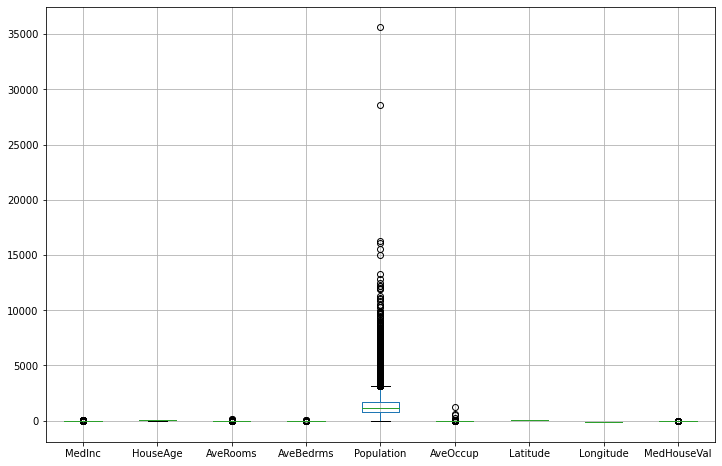

In [ ]:
# outlier detection using boxplot
df.boxplot(figsize=(12,8))

Dari visualisasi boxplot di atas, kita dapat menyimpulkan bahwa terdapat outlier pada kolom MedInc, AveRooms, Population, AveOccup, dan MedHouseVal

In [ ]:
from scipy.stats import skew, kurtosis

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

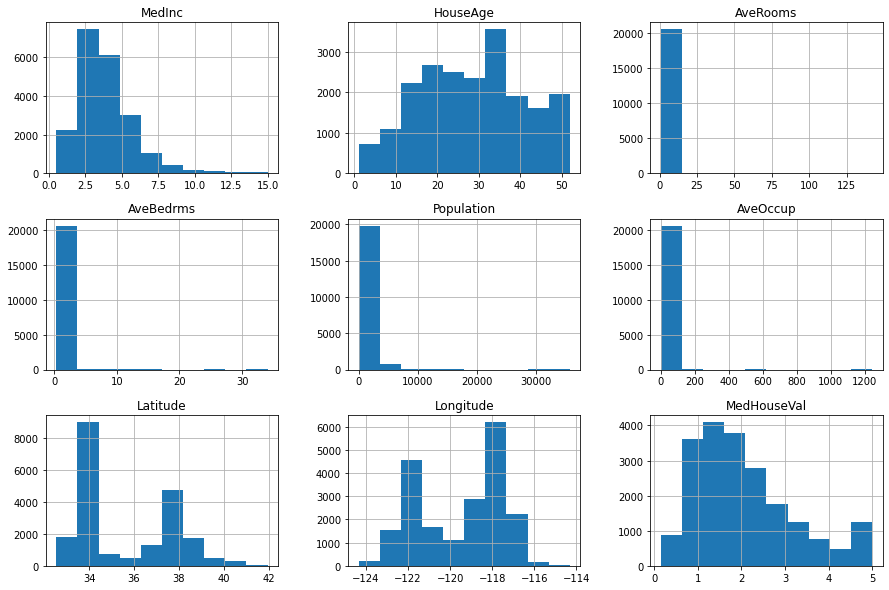

In [ ]:
# size shape data using visualization
df.hist(figsize=(15,10))

Berdasarkan penyebaran data di atas, untuk HouseAge, Latitude dan Longitude memiliki penyebaran data yang merata sehingga dapat terlihat bahwa tidak ada outlier. Berbeda dengan MedInc, AveRooms, AveBedrms, Population, AveOccup, dan MedHouseVal terlihat memiliki arah yang positif atau penyebaran data banyak di sebelah kiri. Dengan demikian variabel tersebut memiliki nilai outlier yang dimana nilai outliernya sendiri lebih besar dari mean-nya.

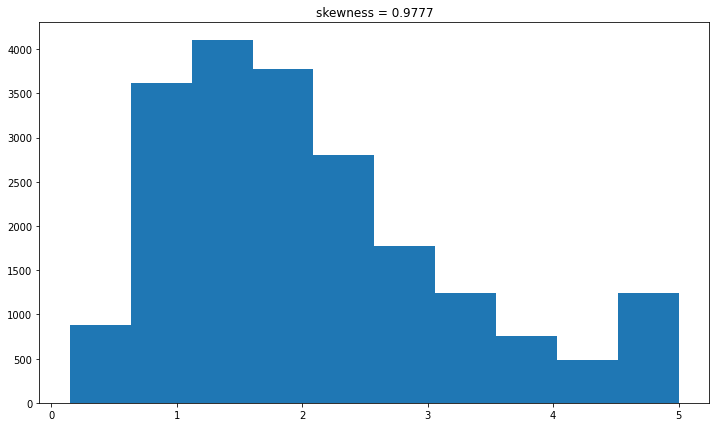

In [ ]:
# calculate the skewness value in the MedHouseVal column
skew_MedHouseVal = round(skew(df['MedHouseVal'], bias=True),4)
title = 'skewness = '+str(skew_MedHouseVal)
plt.figure(figsize=(12,7))
plt.title(title)
plt.hist(df['MedHouseVal'])
plt.show()

Berdasarkan hasil di atas, dapat disimpulkan bahwa data dari MedHouseVal memiliki arah yang positif atau penyebaran data lebih banyak di sebelah kiri. MedHouseVal ini memiliki nilai outlier yang nilainya lebih besar dari mean-nya sehingga ekor distribusi terbentuk ke kanan atau positif.

## Implementasikan metode statistika deskriptif minimal 2 metode untuk mendapatkan karakteristik data

### Mean

In [ ]:
# using pandas
df['MedHouseVal'].mean()

2.068558169089147

### Median

In [ ]:
# using pandas
df['MedHouseVal'].median()

1.797

### Range

In [ ]:
# Range calculation on data series
range = df['MedHouseVal'].max() - df['MedHouseVal'].min()
print('range : ', range)

range :  4.85002


### Standar Deviation

In [ ]:
# Standar deviation calculation using pandas
std = df['Population'].std()
print('simpangan baku : ', std)

simpangan baku :  1132.462121765341
